Project 2

Lagan Sharma (ls5612)

Sayantan Mukhopadhyay (sm9752)

In [1]:
#importing libraries
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from IPython.display import display

Inputting the Train and Test filenames and initializing the corresponding Labels

In [2]:
#storing the images and labels in corresponding lists
train_images = ["subject01.happy.jpg", "subject02.normal.jpg", "subject03.normal.jpg", "subject07.centerlight.jpg", 
                "subject10.normal.jpg", "subject11.normal.jpg", "subject14.normal.jpg", "subject15.normal.jpg"]
pred_label = ["Subject 1", "Subject 2", "Subject 3", "Subject 7", "Subject 10", "Subject 11", "Subject 14", "Subject 15"]

test_images = ["subject01.normal.jpg", "subject07.happy.jpg", "subject07.normal.jpg", "subject11.happy.jpg", "subject14.happy.jpg", 
               "subject14.sad.jpg"]
true_label = ["Subject 1", "Subject 7", "Subject 7", "Subject 11", "Subject 14", "Subject 14"]

m Training faces and tl Testing faces, each of size n1 x n2

In [3]:
m = len(train_images)     #number of training images
tl = len(test_images)     #number of testing images
n1, n2 = mpimg.imread(train_images[0]).shape      #getting the dimensions of the images

Reading m Training images and for each image i, the rows are stacked together to form a column vector ri, stored together in a matrix r

In [4]:
r = []
for i in range(m):
    ri = mpimg.imread(train_images[i])      #reading images into numpy arrays
    ri = ri.reshape(n1 * n2, )      #reshaping the numpy arrays to column vectors
    r.append(ri)
r = np.asarray(r)

Mean face mn is computed by taking average over the m faces using matrix r

In [5]:
mn = r.mean(axis=0)     #calculating mean face

Plotting mean face mn and saving the image into a jpg

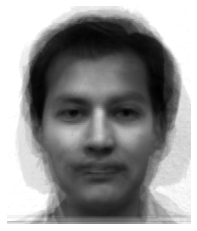

In [6]:
plt.axis('off')
plt.imshow(mn.reshape(n1, n2), cmap='gray')
plt.savefig('meanface.jpg', bbox_inches='tight', pad_inches=0)
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
Image.open('meanface.jpg').resize((n2, n1), Image.LANCZOS).save('meanface.jpg')     #resizing plotted image to original image size and saving as .jpg
plt.show()

Subtracting mean face mn from each training face stored in r and updating r using $\vec{R_\text{i}} = R_\text{i} - m$

In [7]:
r = np.subtract(r,mn)

Putting all the training faces into a single matrix a of dimentions (n1 x n2) x m

In [8]:
a = r.transpose()

Calculating covariance matrix $L = A^T.A$, with dimensions M x M because $C=A.A^T$, with dimensions (n1 x n2) x (n1 x n2) is beyond our computation capabilities

In [9]:
l = np.cov(a.transpose())

Calculating eigen vectors of l into a single matrix v

In [10]:
eigen_values, v = np.linalg.eig(l)

Calculating m largest eigenvectors of c to u, which then contains m eigenfaces and has dimensions (n1 x n2) x m, using formula $U= A × V$ and transpose of u as ut

In [11]:
u = a.dot(v)
ut = u.transpose()

For each training face from 0 to m - 1, obtaining its eigenface coefficients, using formula $\Omega_i = U^T × \vec{R_\text{i}}$ for i = 1 to M

In [12]:
o = []
for i in range(0, m):
  ox = np.dot(ut, r[i])
  o.append(ox)
o = np.asarray(o)

Printing Eigenface coefficients of Training images

In [13]:
for i in range(0, m):
  print("File:", train_images[i])
  print("Label:", pred_label[i])
  print("Eigneface coefficients:", o[i])
  print("")

File: subject01.happy.jpg
Label: Subject 1
Eigneface coefficients: [-2.14549134e+06  2.01164312e+07  2.15986910e-09  2.16175558e+07
  4.49520053e+07  5.59150315e+07 -7.94095481e+07 -1.21272021e+07]

File: subject02.normal.jpg
Label: Subject 2
Eigneface coefficients: [-8.58839316e+07  6.25290432e+07 -5.13809824e-09 -1.38566611e+07
 -3.86553463e+07  5.77694777e+07  2.73940076e+07 -2.91768462e+06]

File: subject03.normal.jpg
Label: Subject 3
Eigneface coefficients: [-7.30419026e+07  1.42032113e+07  1.89565605e-08  4.16444445e+06
 -1.46174372e+07 -5.94636676e+07 -6.27227395e+07 -2.60065258e+07]

File: subject07.centerlight.jpg
Label: Subject 7
Eigneface coefficients: [-1.52701331e+07 -9.07974642e+07 -1.90703695e-08  2.13296843e+07
 -1.50417719e+07 -2.63347435e+06  6.73765860e+07 -2.62575437e+07]

File: subject10.normal.jpg
Label: Subject 10
Eigneface coefficients: [-2.62652584e+06 -7.26417303e+07 -2.44289677e-09  2.47981000e+06
 -1.84775840e+07 -5.08986833e+06  4.65216344e+06  6.93117119e+

Plotting the m eigenfaces of the training images and saving them into jpg

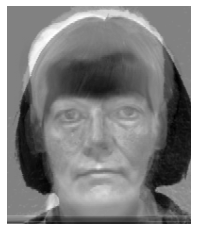

subject01.happy.jpg Subject 1


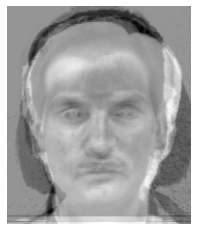

subject02.normal.jpg Subject 2


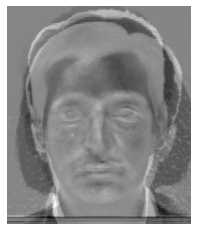

subject03.normal.jpg Subject 3


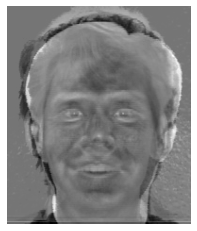

subject07.centerlight.jpg Subject 7


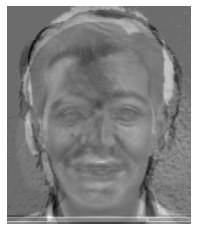

subject10.normal.jpg Subject 10


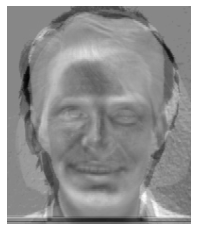

subject11.normal.jpg Subject 11


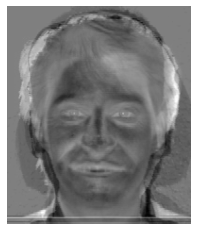

subject14.normal.jpg Subject 14


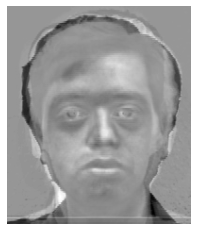

subject15.normal.jpg Subject 15


In [14]:
for i in range(m):
    plt.axis('off')
    plt.imshow(ut[i].reshape(n1,n2), cmap='gray')
    plt.savefig('eigenface_' + train_images[i], bbox_inches='tight', pad_inches=0)
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    #resizing plotted image to original image size (using LANCZOS anti-aliasing) and saving as .jpg
    Image.open('eigenface_' + train_images[i]).resize((n2, n1), Image.LANCZOS).save('eigenface_' + train_images[i])
    plt.show()
    print(train_images[i], pred_label[i])

Reading tl Testing images of faces and reshaping their grayscale matrixes into the same order as Training images

In [15]:
t = []
for i in test_images:
  ti = mpimg.imread(i)      #reading the testing images to numpy array
  ti = ti.reshape(n1 * n2,)     #reshaping the numpy array to column vector 
  t.append(ti)
t = np.asarray(t)     #storing all the column vectors into a single numpy array t

Subtracting mean face mn from input faces in t using $\vec{I} = I - m$

In [16]:
t = np.subtract(t, mn)

Computing the eigenface coefficients oi of Testing faces using $\Omega_I = U^T\vec{I}$

In [17]:
oi = []
for i in range(0, tl):
  oix = np.dot(ut,t[i])
  oi.append(oix)
oi = np.asarray(oi)

Printing Eigenface coefficients of Testing images

In [18]:
for i in range(0, tl):
  print("File:", test_images[i])
  print("Label:", true_label[i])
  print("Eigneface coefficients:", oi[i])
  print("")

File: subject01.normal.jpg
Label: Subject 1
Eigneface coefficients: [ 2.80339894e+07  2.34648126e+06  4.09184704e-09  8.25440772e+06
  4.34601543e+07  3.37021797e+07 -7.52727547e+07 -8.02856834e+06]

File: subject07.happy.jpg
Label: Subject 7
Eigneface coefficients: [-9.82359865e+07 -1.17310191e+07 -4.40800287e-08  1.14994467e+07
 -2.18686836e+06 -8.12372616e+06  2.60480030e+07 -1.32135051e+07]

File: subject07.normal.jpg
Label: Subject 7
Eigneface coefficients: [-1.16771406e+08  1.94535475e+07 -4.54533514e-08  2.00202560e+05
 -9.36449714e+06 -1.90152265e+07  2.74435806e+07 -1.97650518e+07]

File: subject11.happy.jpg
Label: Subject 11
Eigneface coefficients: [ 2.82605165e+08  6.92765475e+07  1.32574981e-07 -6.87873720e+06
 -2.04464233e+07 -6.01062509e+06  3.58215407e+07  3.16020984e+06]

File: subject14.happy.jpg
Label: Subject 14
Eigneface coefficients: [ 1.24208640e+07 -7.17008884e+07 -2.58943412e-08 -1.29282516e+07
  2.23758718e+07  6.94887484e+06 -1.82530628e+07 -2.64451272e+07]

F

Computing distance between input faces and training images using Euclidean distance $d_i = dist(Ω_I, Ω_i)$ for i = 1 to M and finding the index of the face with the least $d_i$ as predicted face pf.

In [19]:
pf = []
for i in range(tl):
  dj = np.linalg.norm(oi[i] - o, axis=1)
  j = np.argmin(dj)
  pf.append(j)

Displaying the Predicted Label (& corresponding Training file name) and True Label (& corresponding Testing file name), with its Eigenface coefficients.

In [20]:
tp = 0
k = 0
for i in pf:
  print("Predicted Label:", pred_label[i], train_images[i], ", True Label:", true_label[k], test_images[k])
  Image.open(test_images[k]).show()
  print("Eigenface coefficient: ", oi[k])
  print("")
  if (pred_label[i] == true_label[k]):
    tp += 1
  k += 1

Predicted Label: Subject 1 subject01.happy.jpg , True Label: Subject 1 subject01.normal.jpg
Eigenface coefficient:  [ 2.80339894e+07  2.34648126e+06  4.09184704e-09  8.25440772e+06
  4.34601543e+07  3.37021797e+07 -7.52727547e+07 -8.02856834e+06]

Predicted Label: Subject 2 subject02.normal.jpg , True Label: Subject 7 subject07.happy.jpg
Eigenface coefficient:  [-9.82359865e+07 -1.17310191e+07 -4.40800287e-08  1.14994467e+07
 -2.18686836e+06 -8.12372616e+06  2.60480030e+07 -1.32135051e+07]

Predicted Label: Subject 2 subject02.normal.jpg , True Label: Subject 7 subject07.normal.jpg
Eigenface coefficient:  [-1.16771406e+08  1.94535475e+07 -4.54533514e-08  2.00202560e+05
 -9.36449714e+06 -1.90152265e+07  2.74435806e+07 -1.97650518e+07]

Predicted Label: Subject 11 subject11.normal.jpg , True Label: Subject 11 subject11.happy.jpg
Eigenface coefficient:  [ 2.82605165e+08  6.92765475e+07  1.32574981e-07 -6.87873720e+06
 -2.04464233e+07 -6.01062509e+06  3.58215407e+07  3.16020984e+06]

Predi

Calculating Accuracy as (Correct Predictions / Total Observations) x 100%

In [21]:
accuracy = (tp / tl) * 100
print("Accuracy:", accuracy, "%")

Accuracy: 66.66666666666666 %
